In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Reading the data

In [4]:
df = pd.read_csv(os.path.abspath('../data/Nal_filtre_FLX_NEE_01012011_31122017.csv'), encoding = "ISO-8859-1", sep = ';')
df.columns = df.iloc[0] # fix the col names to be the 1st col
df = df.iloc[1:] # fix the col names to be the 1st col

/tmp/ipykernel_1288830/2543690903.py:1: DtypeWarning: Columns (0,2,3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.abspath('../data/Nal_filtre_FLX_NEE_01012011_31122017.csv'), encoding = "ISO-8859-1", sep = ';')


In [5]:
df.head(3)

,heure,DateUTC,NEE,Ustar,Swin,T_meteo,VPD,Tsol1_10,Hv1,Hv2
1,0,01/01/2011 00:00,NaN,0.23159,NaN,NaN,NaN,NaN,0.038,0.056
2,0.5,01/01/2011 00:30,NaN,0.20874,-3.113,18.64,1.569496568,27.385,0.038,0.056
3,1,01/01/2011 01:00,NaN,0.17778,-3.181,17.785,1.453069295,27.14,0.038,0.056


---

### Convert to Numpy

In [6]:
X = df.iloc[:,2:].values
X = X.astype(float)
print(X.shape)

(122736, 8)


In [7]:
736-640

96

---

#### Reshape Into a Tensor

First, let us limit the data to just 7 years

In [8]:
X = X[:365 * (len(X)//365) ,] # we are removing the extra days
# i think we can use the extra rows for testing, if NEE is not NAN
print(X.shape)
X_tensor = np.reshape(X, (7, -1,8 )) 
print(X_tensor.shape) # (t, rows, cols)
print(X_tensor[0][0])

(122640, 8)
(7, 17520, 8)
[    nan 0.23159     nan     nan     nan     nan 0.038   0.056  ]


#### Seasonality across the years

In [9]:
Xseason = np.nanmean(X_tensor, axis = 0) # so we took the avrage across 7 years
print(Xseason.shape)
print(Xseason[0])

(17520, 8)
[ 1.0461021   0.148164   -1.81557333 21.4723275   1.88050172 28.088
  0.03728571  0.056     ]


/tmp/ipykernel_1288830/1513193925.py:1: RuntimeWarning: Mean of empty slice
  Xseason = np.nanmean(X_tensor, axis = 0) # so we took the avrage across 7 years


[1.0461021  0.88543948 0.92907611 ... 1.09630149 0.70156725 1.83129817]

[ 1.0461021   0.148164   -1.81557333 21.4723275   1.88050172 28.088
  0.03728571  0.056     ]


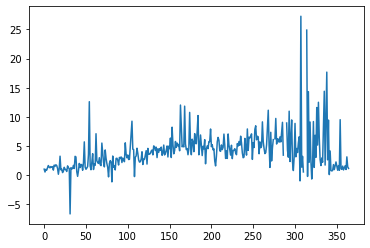

In [24]:
print(Xseason[:,0])
print()
print(Xseason[0,:])
    
plt.plot(Xseason[::48,0])

# plt.plot(Xseason[:,1] )

#### Removing Seasonality

In [9]:
XClean = X_tensor - Xseason
print(XClean.shape)
print(XClean[0][0])

(7, 17520, 8)
[           nan 8.34260000e-02            nan            nan
            nan            nan 7.14285714e-04 6.93889390e-18]


In [10]:
print(0.148164-0.23159)

-0.083426


working

### Smoothing

#### Standarization

In [11]:
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
scaled_arr = scaler.fit_transform(XClean.reshape(-1,8))
XClean_df = pd.DataFrame(scaled_arr, columns = df.columns[2:])
XClean_df

,NEE,Ustar,Swin,T_meteo,VPD,Tsol1_10,Hv1,Hv2
0,NaN,0.966770,NaN,NaN,NaN,NaN,0.040658,4.325519e-16
1,NaN,0.515884,-0.014502,-0.609769,-0.542969,-0.252160,0.048789,4.325519e-16
2,NaN,0.188195,-0.010761,-0.691270,-0.618200,-0.250490,0.048789,4.325519e-16
3,NaN,0.433752,-0.005437,-0.616124,-0.553391,-0.257726,0.048789,1.552177e-02
4,NaN,1.096895,-0.005760,-0.522909,-0.464583,-0.277766,0.048789,1.552177e-02
...,...,...,...,...,...,...,...,...
122635,NaN,NaN,-0.020858,0.690300,0.583999,NaN,-0.024395,7.760886e-02
122636,NaN,NaN,-0.012959,0.440189,0.255657,NaN,-0.024395,8.536974e-02
122637,NaN,NaN,-0.006576,0.384013,0.164128,NaN,-0.016263,8.536974e-02
122638,NaN,NaN,0.001947,0.415134,0.165980,NaN,-0.016263,8.536974e-02


In [12]:
XClean_tensor = np.reshape(XClean_df.values, (7,-1,8) )
print(XClean_tensor.shape)
print(XClean_tensor[0])

(7, 17520, 8)
[[            nan  9.66769785e-01             nan ...             nan
   4.06578876e-02  4.32551896e-16]
 [            nan  5.15884424e-01 -1.45015314e-02 ... -2.52159978e-01
   4.87894652e-02  4.32551896e-16]
 [            nan  1.88194823e-01 -1.07606066e-02 ... -2.50490045e-01
   4.87894652e-02  4.32551896e-16]
 ...
 [            nan -1.69769345e-02  1.76442955e-02 ...  9.36498781e-01
  -2.43947326e-01 -5.12218447e-01]
 [            nan  3.43787752e-03  1.49544944e-02 ...  8.69701436e-01
  -2.43947326e-01 -5.12218447e-01]
 [            nan             nan  2.68709081e-02 ...  8.09583825e-01
  -2.43947326e-01 -5.12218447e-01]]


---